In [52]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib

In [53]:
filepath = './tweets.csv'

df = pd.read_csv(filepath, delimiter=',',
                skiprows=1, # skips the first line of the file
                encoding='unicode_escape', # prevents errors on unknown symbols
                usecols=['Vertex 1', 'Vertex 2', 'Tweet'], # only import the columns we use
                )
df.columns = ['source_user', 'mentioned_user', 'tweet_text']

print(df)

         source_user   mentioned_user  \
0           notherle        dude_stay   
1           notherle       facikwacik   
2           notherle     crazycold739   
3           notherle       filippecak   
4           notherle      u_yousolame   
..               ...              ...   
842     bulletking61     bulletking61   
843     mx_hippakrit     mx_hippakrit   
844  shers_wird_stuf  shers_wird_stuf   
845   fastblueapple9  shers_wird_stuf   
846     centurionfox            steam   

                                            tweet_text  
0    RT @dude_stay: Plz help us save the this game ...  
1    RT @FacikWacik: My favorite game is dying ????...  
2    RT @CraZyCold739: I associate with this game n...  
3    RT @FilipPecak: Hi people. Let's save #SafeTF2...  
4    RT @u_yousolame: I been playing tf2 for a few ...  
..                                                 ...  
842              #SafeTF2  PLZZZZZZZZZZZZZZZZZZZZZZZZZ  
843  I know I'm late for this but #SafeTF2 (':\n\nh

In [54]:
# add nodes? first export df to list/dictionary then transform? or easier way?

In [55]:
G = nx.DiGraph()
colors = []
for source_user, mentioned_user, tweet_text in zip(df.source_user, df.mentioned_user, df.tweet_text):

    if source_user != mentioned_user:
        G.add_edge(source_user, mentioned_user)
        if "RT" in tweet_text[:3]:
            colors.append("black")
        else:
            colors.append("red")

node_colors = np.arange(0.0, 1.0, 1/G.number_of_nodes())
print(len(node_colors))

344


In [56]:
G.number_of_nodes()

344

In [57]:
G.number_of_edges()

434

In [75]:
measures = {"centrality": {'in_degree': nx.in_degree_centrality(G), 'out_degree': nx.out_degree_centrality(G),
                           'betweenness': nx.betweenness_centrality(G), 'closeness': nx.closeness_centrality(G)}}
out_degrees = []
for key, value in nx.out_degree_centrality(G).items():
    out_degrees.append(value)

minima = min(out_degrees)
maxima = max(out_degrees)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
node_colors = []
for v in out_degrees:
    node_colors.append(mapper.to_rgba(v)[0])


[0.13201076509034987, 0.013656286043829298, 0.027312572087658596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013656286043829298, 0.0, 0.013656286043829298, 0.013656286043829298, 0.0, 0.013656286043829298, 0.013656286043829298, 0.027312572087658596, 0.0, 0.0, 0.013656286043829298, 0.013656286043829298, 0.040968858131487894, 0.0, 0.0, 0.0, 0.013656286043829298, 0.013656286043829298, 0.0, 0.013656286043829298, 0.0, 0.013656286043829298, 0.013656286043829298, 0.013656286043829298, 0.013656286043829298, 0.013656286043829298, 0.0, 0.013656286043829298, 0.013656286043829298, 0.027312572087658596, 0.0, 0.040968858131487894, 0.1679354094579008, 0.0, 0.0, 0.013656286043829298, 0.0, 0.0, 0.013656286043829298, 0.0, 0.013656286043829298, 0.0, 0.040968858131487894, 0.0, 0.0, 0.0, 0.013656286043829298, 0.013656286043829298, 0.027312572087658596, 0.013656286043829298, 0.0, 0.05917723952326029, 0.0, 0.0, 0.05917723952326029, 0.0, 0.0, 0.013656286043829298, 0.013656286043829298, 0.0, 0.013656286043829298, 0.0

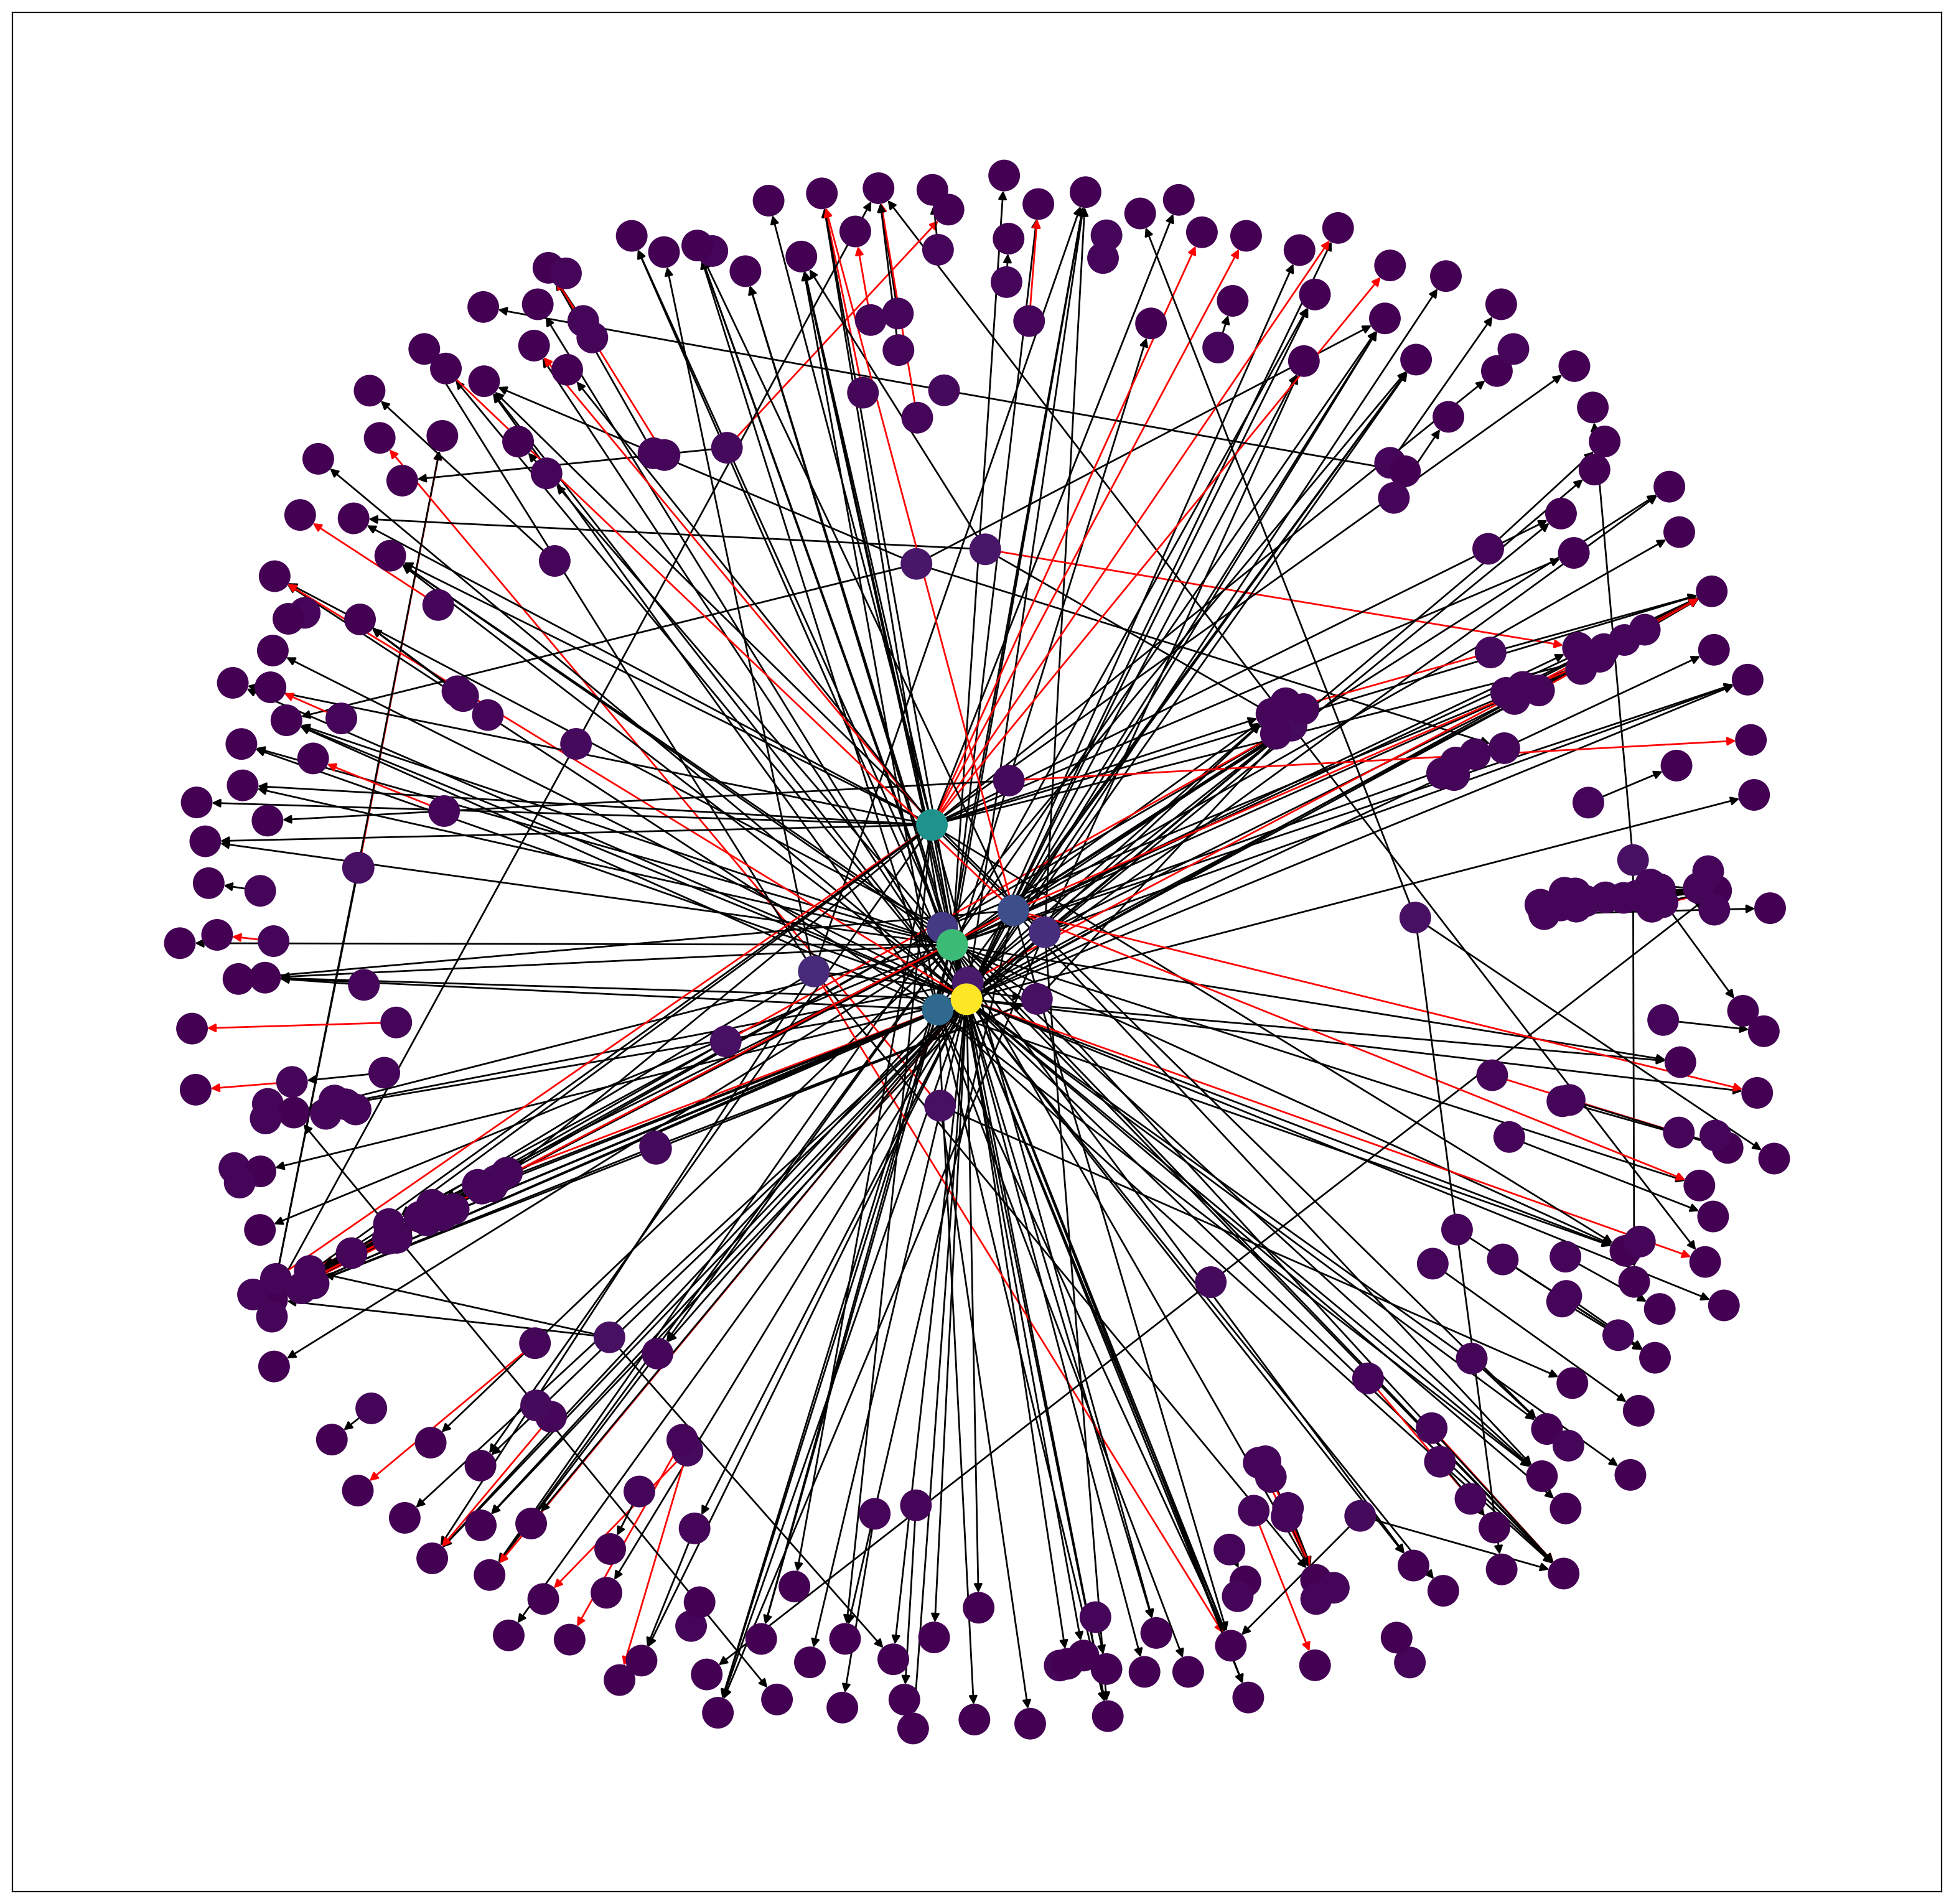

In [76]:
plt.figure(figsize=(20, 20), dpi= 200)
nx.draw_networkx(G= G, edge_color=colors, node_color=node_colors, with_labels=False)